In [2]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

In [3]:
#to define intensities of skin 
lower = np.array([0, 48, 80], dtype = "uint8")
upper = np.array([20, 255, 255], dtype = "uint8")

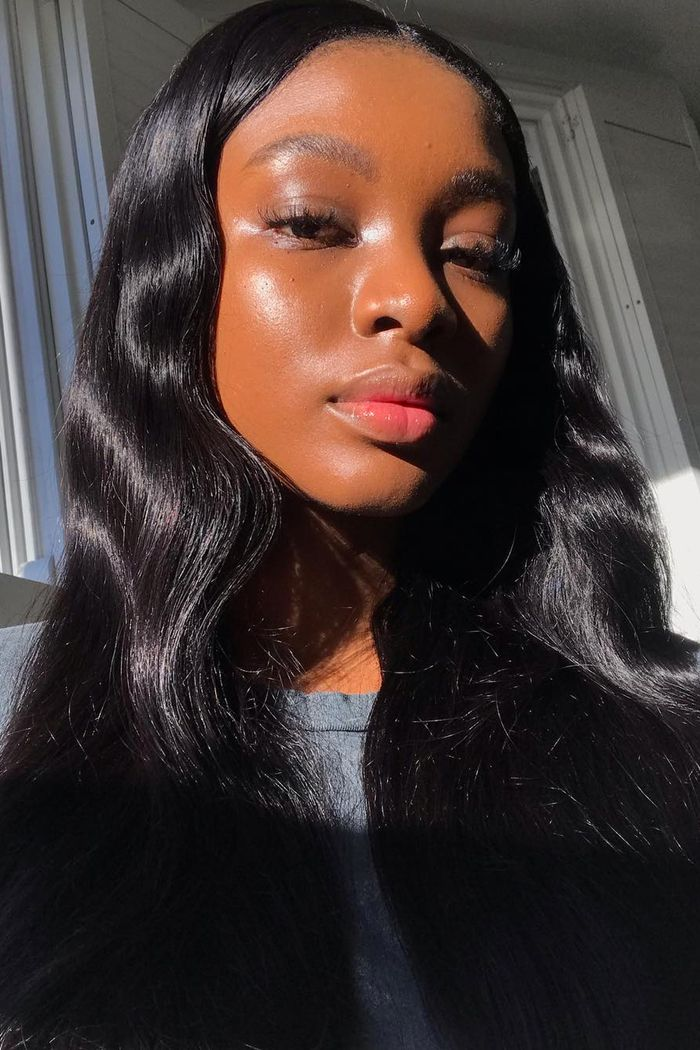

In [4]:
img = cv2.imread("/content/test_3.jpg")
cv2_imshow(img)

In [5]:
frame = imutils.resize(img, width = 400)
converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  #converting BGR to HSV
skinMask = cv2.inRange(converted, lower, upper)  #getting skin mask

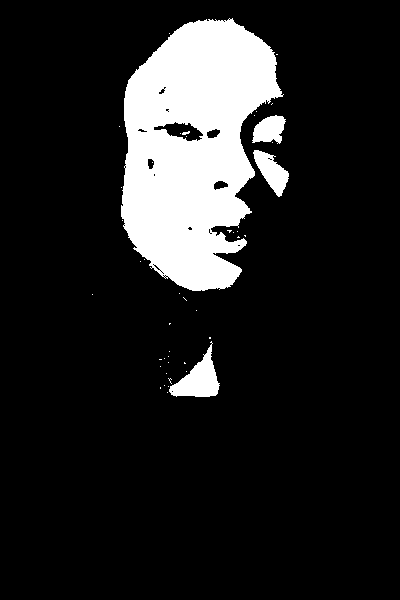

In [6]:
cv2_imshow(skinMask)

In [7]:
# blur the mask to help remove noise, then apply the
	# mask to the frame
skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skin = cv2.bitwise_and(frame, frame, mask = skinMask) #bitwise_and will give only the region of skin overlapping with skin

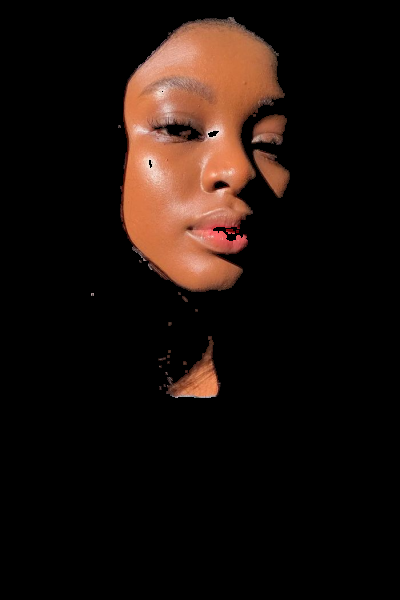

In [8]:
cv2_imshow(skin)

In [9]:
skin.reshape(-1,720000)[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [10]:
!unzip "/content/drive/My Drive/face_images/105271_250645_bundle_archive.zip"

Archive:  /content/drive/My Drive/face_images/105271_250645_bundle_archive.zip
replace real_and_fake_face/training_fake/easy_100_1111.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

(100, 100, 3)


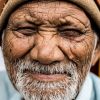

In [16]:
img = cv2.imread("/content/real_and_fake_face/training_real/real_00901.jpg")
img = imutils.resize(img, width = 100)
print(img.shape)
cv2_imshow(img)

In [17]:
import os
features = []
for filename in os.scandir("/content/real_and_fake_face/training_real"):
  img = cv2.imread(str(filename.path))
  frame = imutils.resize(img, width = 100)
  converted = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)  #converting BGR to HSV
  skinMask = cv2.inRange(converted, lower, upper)  #getting skin mask
  skinMask = cv2.GaussianBlur(skinMask, (3, 3), 0)
  skin = cv2.bitwise_and(frame, frame, mask = skinMask) #bitwise_and will give only the region of skin overlapping with skin
  features.append(skin.reshape(-1,30000)[0])


In [18]:
X=np.array(features)

In [19]:
X.shape

(1081, 30000)

In [20]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

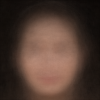

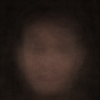

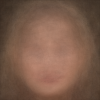

In [24]:
for i in range(3):
  cv2_imshow(km.cluster_centers_[i].reshape(100,100,3))  # plotting cluster centroids

In [25]:
img = cv2.imread("/content/real_and_fake_face/training_real/real_00901.jpg")
img = imutils.resize(img, width = 100)
km.predict(img.reshape(-1,30000))

array([2], dtype=int32)

In [31]:
sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k


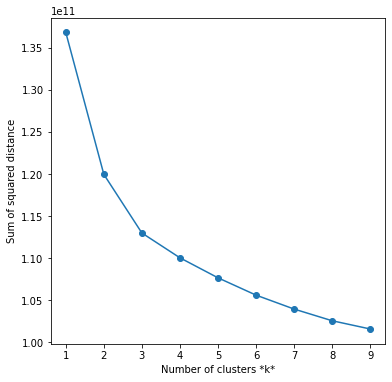

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

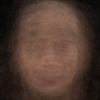

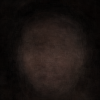

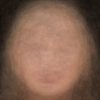

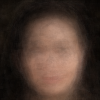

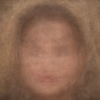

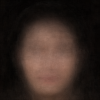

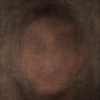

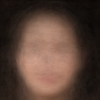

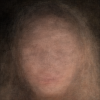

In [34]:
for i in range(9):
  cv2_imshow(km.cluster_centers_[i].reshape(100,100,3))  # plotting cluster centroids